BRUH...
Fix Velocity Dispersion (And uncertainty first)

Things needed:
Cluster Data
Bins

split bins 
Find mean of the color
find velocity dispersion
find error bars

Plot velocity dispersion with error bars


In [64]:
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

#this 'magic' matplotlib command tells iPython to show any figures in this notebook, 
#rather than a separate window or saving them in separate files.
%matplotlib inline

#These commands help python remember how to format my figures so that they look nice
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [65]:
############ File here (need cz ecz dist r)  ###########################
#cz, ecz, r, mem, dist = np.loadtxt(r"C:\Users\Erick\Documents\School\Research\Data\comaallzad.tab.010.q25mem.tab", usecols=(2,3,6,9,10), skiprows=2, unpack=True)
#cz, ecz, r, mem, dist = np.loadtxt(r"C:\Users\Erick\Documents\School\Research\Data\a2069newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
#cz, ecz, r, mem, dist = np.loadtxt(r"C:\Users\Erick\Documents\School\Research\Data\a2219newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
#cz, ecz, r, mem, dist = np.loadtxt(r"C:\Users\Erick\Documents\School\Research\Data\rxj1720newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
########################################################################

## Using Denise 1980 this calculates the dispersion of an array of binned velocities and errors
## arrays have each column acting as bin


def dispersion(vel,err,mag):
    
    data=[]
    
    ##This will calculate each dispersion of the array
    for i in range(len(vel)):

        c=3*10**5
        df=(len(vel[i])-1)
        vbar= np.average(vel[i])
        eczbar=np.average(err[i])

        vel1= (vel[i]- vbar)/(1+vbar/c)
        velDis= sum(vel1**2/df) - (eczbar**2/(1+vbar/c)**2 )
        
        interval= stats.chi2.interval(.68,df)
        deltastar2= (eczbar)**2 /((1+vbar/c)**2)

        temp=[np.average(mag[i])]
        temp.append(np.sqrt(velDis))
        temp.append(np.sqrt((np.sqrt(df/interval[1])-1)**2 *velDis + deltastar2*(1+deltastar2/(2*velDis))/(df+1)))
        temp.append(np.sqrt((np.sqrt(df/interval[0])-1)**2 *velDis + deltastar2*(1+deltastar2/(2*velDis))/(df+1)))
        data.append(temp)
         
    return data


##This is a function taken from stack exchange that splits a list into n-equal parts
def chunkIt(seq, num):
    
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

##Function of sorts that will find the indexes of members of clusters (used for Red Blue split)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

##main function to run the dispersion calculation
def main(Bins,r,cz,ecz,dist=1,mem=1,plot='yes'):
    
    ##Using an optional distance parameter to have a radial cut and then organizing
    ##Velocity and errors to be ordered by magnitude in the r filter
    if (type(dist) is int and type(mem) is int) :
        magIndexDcut = np.argsort(r)
        print("No distance cut:")
    elif not(type(dist) is int):
        magIndexDcut = np.argsort(r[dist < 1])
        print('Using a distance cut:')
    else:
        r = r[mem == 1]
        cz= cz[mem ==1]
        ecz=ecz[mem==1]
        magIndexDcut = np.argsort(r)
        print('Using a membership cut')
        
    ##spliting the velocities and errors into magnitude bins
    velocities = chunkIt(cz[magIndexDcut],Bins)
    errors = chunkIt(ecz[magIndexDcut],Bins)
    magnitude=chunkIt(r[magIndexDcut],Bins)
    rrr=chunkIt(r,Bins)

    values = dispersion(velocities,errors,magnitude)
    
    names = range(1,Bins+1)
    df = pd.DataFrame(values, index=names, columns=["Average r Magnitude","Dispersion (km/s)","Low Err(km/s)","Up Err(km/s)"])
    print(df)
    
#     if (plot=='yes'):
    
#         for i in range(Bins):
#             plt.xlabel("Magnitude Bins")
#             plt.ylabel("Velocity Dispersion (km/s)")
#             plt.scatter(values[i][0],values[i][1])
#             plt.errorbar(values[i][0],values[i][1],yerr=[[values[i][2]],[values[i][3]]],capsize=3,c='k')
    return df

def normalized(Bins,r,cz,ecz,dist=1,mem=1):
    ##Using an optional distance parameter to have a radial cut and then organizing
    ##Velocity and errors to be ordered by magnitude in the r filter
    if (type(dist) is int and type(mem) is int) :
        magIndexDcut = np.argsort(r)
        print("No distance cut:")
    elif not(type(dist) is int):
        magIndexDcut = np.argsort(r[dist < 1])
        print('Using a distance cut:')
    else:
        r = r[mem == 1]
        cz= cz[mem ==1]
        ecz=ecz[mem==1]
        magIndexDcut = np.argsort(r)
        print('Using a membership cut')
    
    velocities = chunkIt(cz[magIndexDcut],1)
    errors = chunkIt(ecz[magIndexDcut],1)
    magnitude=chunkIt(r[magIndexDcut],1)
    rrr=chunkIt(r,1)

    normal = dispersion(velocities,errors,magnitude)
    print("###############################",normal)
    
    velocities = chunkIt(cz[magIndexDcut],Bins)
    errors = chunkIt(ecz[magIndexDcut],Bins)
    magnitude=chunkIt(r[magIndexDcut],Bins)
    rrr=chunkIt(r,Bins)

    values = dispersion(velocities,errors,magnitude)
    
    names = range(1,Bins+1)
    df = pd.DataFrame(values, index=names, columns=["Average r Magnitude","Dispersion (km/s)","Low Err(km/s)","Up Err(km/s)"])
    print(df)
    print(values)
    
    downerrors= [np.sqrt((normal[0][2]/normal[0][1])**2+(values[i][2]/values[i][1])**2) for i in range(len(values))]
    uperrors=[np.sqrt((normal[0][3]/normal[0][1])**2+(values[i][3]/values[i][1])**2) for i in range(len(values))]
    
    for i in range(Bins):
        plt.xlabel("Magnitude Bins")
        plt.ylabel("Velocity Dispersion (km/s)")
        plt.scatter(values[i][0]/normal[0][0],values[i][1]/normal[0][1])
        plt.errorbar(values[i][0]/normal[0][0],values[i][1]/normal[0][1],yerr=[[downerrors[i]],[uperrors[i]]],c='k')
#,yerr=[[values[i][2]]/normal[0][2],[values[i][3]]/normal[0][3]],capsize=3

In [66]:
'''
I need to normalize the the velocity dispersion. does that mean the new errors are the old erros divided by the overall 
dispersion. what happens with the error associated error?
'''
import os
os.getcwd()

'C:\\Users\\Erick\\Documents\\School\\Research'

Using a distance cut:
   Average r Magnitude  Dispersion (km/s)  Low Err(km/s)  Up Err(km/s)
1            14.022020         877.959081      55.962974     69.286866
2            15.188366         811.100284      51.468086     63.653258
3            16.075110         838.486013      53.448107     66.172720
4            16.813218         793.767160      50.372389     62.296367
5            17.482545         834.242864      52.952576     65.482360
Using a distance cut:
############################### [[15.919701789264414, 832.17479034150892, 24.928988852253102, 27.403967187567194]]
   Average r Magnitude  Dispersion (km/s)  Low Err(km/s)  Up Err(km/s)
1            14.022020         877.959081      55.962974     69.286866
2            15.188366         811.100284      51.468086     63.653258
3            16.075110         838.486013      53.448107     66.172720
4            16.813218         793.767160      50.372389     62.296367
5            17.482545         834.242864      52.952576    

Text(0.5,1,'Coma')

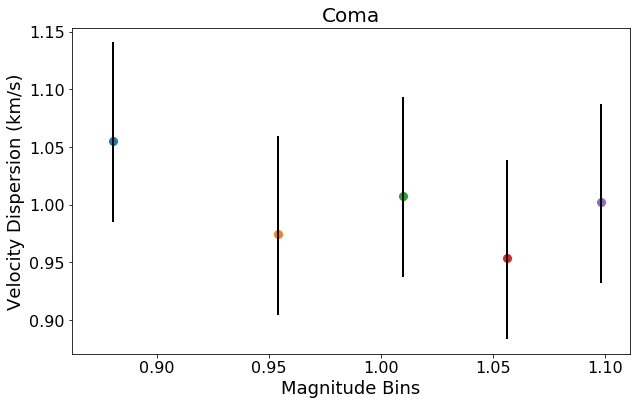

In [67]:
cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+"\Data\comaallzad.tab.010.q25mem.tab", usecols=(2,3,6,9,10), skiprows=2, unpack=True)
#cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+"\Data\a2069newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
#cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+"\Data\a2219newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
#cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+"\Data\rxj1720newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
#2,3,6,9,10

main(5,r,cz,ecz,dist)

#a=main(1,r,cz,ecz,dist,plot='no')
normalized(5,r,cz,ecz,dist)
#print(float(a['Dispersion (km/s)']))
plt.title('Coma')

Using a membership cut
   Average r Magnitude  Dispersion (km/s)  Low Err(km/s)  Up Err(km/s)
1            16.542200         816.678764      71.230172     96.403529
2            17.264020        1045.743100      90.238134    121.864044
3            17.709059         935.639668      80.720170    109.020696
4            18.181922         731.451952      63.125788     85.244632
5            18.727412         961.934098      82.977969    112.076606


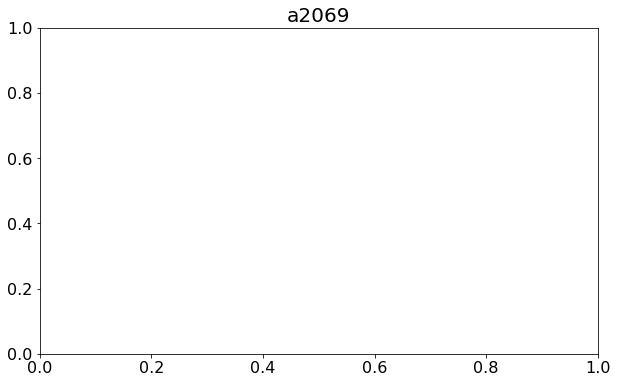

In [68]:
#cz, ecz, r, mem, dist =  np.loadtxt(r"C:\Users\Erick\Documents\School\Research\Data\a2069newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
cz, ecz, r, mem, dist =  np.loadtxt(os.getcwd()+"\Data\\a2069newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
main(5,r,cz,ecz,1,mem)
plt.title('a2069')
cz, ecz, r, mem, dist =  np.loadtxt(os.getcwd()+"\Data\\a2069newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)


Using a membership cut
   Average r Magnitude  Dispersion (km/s)  Low Err(km/s)  Up Err(km/s)
1            17.931250         747.493115      56.825462     73.618692
2            18.693522        1065.954608      80.429795    104.039242
3            19.116824         933.439376      71.034951     91.988886
4            19.559913         961.490084      72.655619     93.926832
5            20.058565        1076.662875      81.645750    105.400106


Text(0.5,1,'a2219')

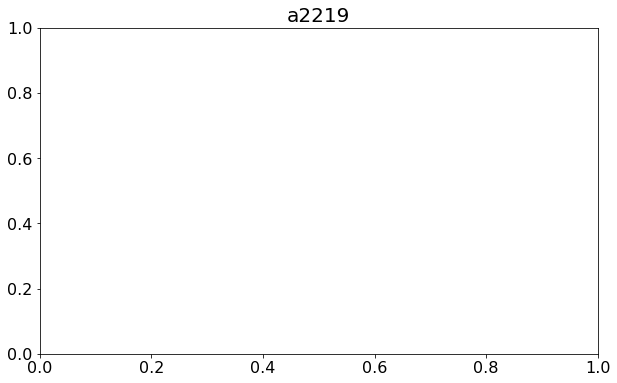

In [69]:
cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+r"\Data\a2219newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)

main(5,r,cz,ecz,1,mem)
plt.title('a2219')

Using a membership cut
   Average r Magnitude  Dispersion (km/s)  Low Err(km/s)  Up Err(km/s)
1            17.759880         692.038052      50.384146     64.438286
2            18.872840         737.548698      53.699833     68.677725
3            19.598120         772.299066      56.280744     71.953266
4            20.238547         906.850191      66.066606     84.473857
5            21.156013         910.307997      66.797356     84.838688


Text(0.5,1,'rxj1720')

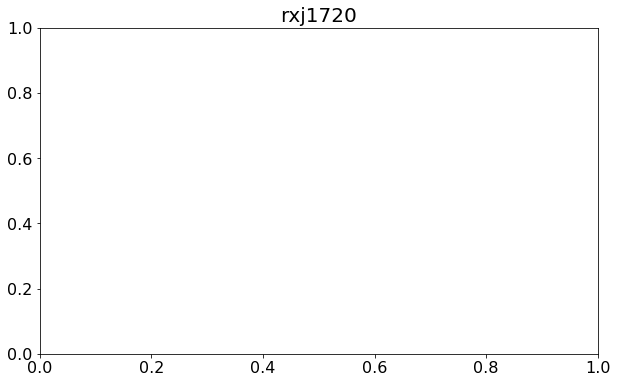

In [70]:
cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+r"\Data\rxj1720newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)

main(5,r,cz,ecz,1,mem)
plt.title("rxj1720")

254


(15.4, 19.2)

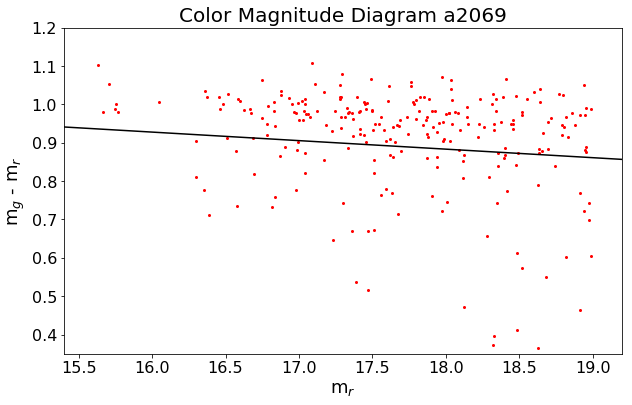

In [71]:
cz1, ecz1, g1, r1, mem1, dist1 =  np.loadtxt(os.getcwd()+r"\Data\a2069newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)

memcut1 = get_indexes(1,mem1)
print(len(memcut1))
plt.scatter(r1[memcut1],g1[memcut1]-r1[memcut1],s=4,c='r')
plt.plot([15,19.5],[.95,.85],c='k',linewidth=1.5)

plt.title('Color Magnitude Diagram a2069')
plt.xlabel('m$_r$')
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.2)
plt.xlim(15.4,19.2)


343


(16.5, 21.3)

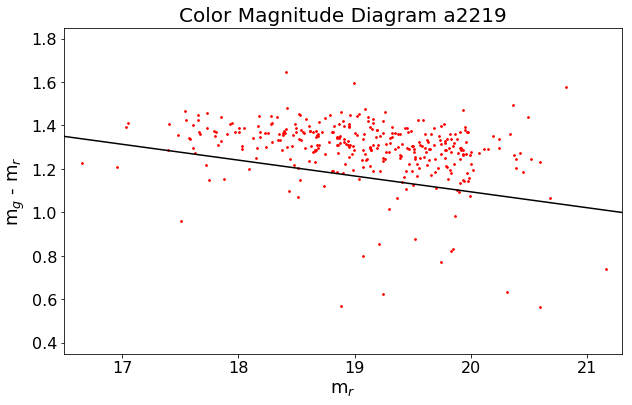

In [72]:
cz2, ecz2, g2, r2, mem2, dist2 = np.loadtxt(os.getcwd()+r"\Data\a2219newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)

memcut2 = get_indexes(1,mem2)
print(len(memcut2))
plt.scatter(r2[memcut2],g2[memcut2]-r2[memcut2],s=3,c='r')
plt.plot([16.5,21.3],[1.35,1.],c='k',linewidth=1.5)

plt.title('Color Magnitude Diagram a2219')
plt.xlabel('m$_r$')
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.85)
plt.xlim(16.5,21.3)


376


(15, 22.5)

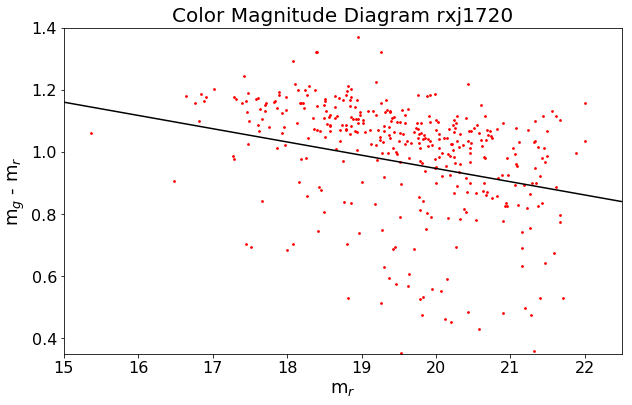

In [73]:
cz3, ecz3, g3, r3, mem3, dist3 = np.loadtxt(os.getcwd()+r"\Data\rxj1720newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)

memcut3 = get_indexes(1,mem3)
print(len(memcut3))
plt.scatter(r3[memcut3],g3[memcut3]-r3[memcut3],s=3,c='r')
plt.plot([15,22.5],[1.16,.84],c='k',linewidth=1.5)


plt.title('Color Magnitude Diagram rxj1720')
plt.xlabel('m$_r$')
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.4)
plt.xlim(15,22.5)


(15.4, 19.2)

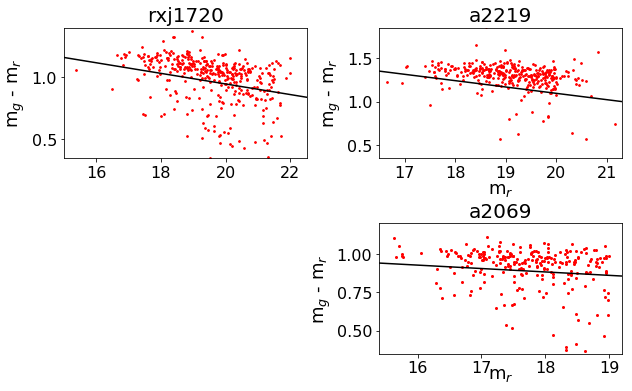

In [74]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3)
##############################################

plt.subplot(221)
plt.scatter(r3[memcut3],g3[memcut3]-r3[memcut3],s=3,c='r')
plt.plot([15,22.5],[1.16,.84],c='k',linewidth=1.5)


plt.title('rxj1720')
#plt.xlabel('m$_r$')
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.4)
plt.xlim(15,22.5)

#################################################################

plt.subplot(222)
plt.scatter(r2[memcut2],g2[memcut2]-r2[memcut2],s=3,c='r')
plt.plot([16.5,21.3],[1.35,1.],c='k',linewidth=1.5)

plt.title('a2219')
plt.xlabel('m$_r$',labelpad=0)
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.85)
plt.xlim(16.5,21.3)

#######################################################################

plt.subplot(224)
plt.scatter(r1[memcut1],g1[memcut1]-r1[memcut1],s=4,c='r')
plt.plot([15,19.5],[.95,.85],c='k',linewidth=1.5)

plt.title('a2069')
plt.xlabel('m$_r$',labelpad=-10)
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.2)
plt.xlim(15.4,19.2)



sdfk;jasdkl;j
'


In [75]:
import numpy as np
a=np.array([1,1,'adsfasdf',11111,])
print(a)

['1' '1' 'adsfasdf' '11111']


In [76]:
a

array(['1', '1', 'adsfasdf', '11111'],
      dtype='<U11')